In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import callbacks

import keras_tuner as kt

In [4]:
data  = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [5]:
x = data.drop(columns='target')
y = data['target']

scaler = StandardScaler()

x= scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state= 42, stratify = y)


In [20]:
def build_model(hp):
    model = Sequential()

    model.add(Dense(
        units=hp.Int('units_0', min_value=16, max_value=256, step=16),
        activation=hp.Choice('activation_0', ['sigmoid', 'tanh', 'relu']),
        input_shape=(x_train.shape[1],)   
    ))
    model.add(Dropout(hp.Float('dropout_0', 0.0, 0.5, step=0.1)))

    # Additional hidden layers
    for i in range(1, hp.Int('num_layers', 1, 20)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', 16, 256, step=16),
            activation=hp.Choice(f'activation_{i}', ['sigmoid', 'tanh', 'relu'])
        ))
        model.add(Dropout(
            hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)
        ))

    # Output layer (binary classification)
    model.add(Dense(1, activation="sigmoid"))

    # Optimizer selection
    optimizer_choice = hp.Choice('optimizer', ['sgd', 'rmsprop', 'adam'])
    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

    if optimizer_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [22]:
import shutil
shutil.rmtree("./untitled_project", ignore_errors=True)

# Hyperband tuner
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=20,
    factor=3,
    overwrite=True
)

callbacks = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Run tuner search
tuner.search(
    x_train, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[callbacks]
)


Trial 30 Complete [00h 00m 12s]
val_accuracy: 0.7865853905677795

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 03m 48s


In [23]:
tuner.get_best_hyperparameters()[0].values

{'units_0': 128,
 'activation_0': 'tanh',
 'dropout_0': 0.4,
 'num_layers': 2,
 'optimizer': 'adam',
 'learning_rate': 0.01,
 'units_1': 240,
 'activation_1': 'tanh',
 'dropout_1': 0.1,
 'units_2': 32,
 'activation_2': 'sigmoid',
 'dropout_2': 0.1,
 'units_3': 16,
 'activation_3': 'sigmoid',
 'dropout_3': 0.30000000000000004,
 'units_4': 112,
 'activation_4': 'relu',
 'dropout_4': 0.1,
 'units_5': 176,
 'activation_5': 'relu',
 'dropout_5': 0.30000000000000004,
 'units_6': 96,
 'activation_6': 'tanh',
 'dropout_6': 0.0,
 'units_7': 144,
 'activation_7': 'sigmoid',
 'dropout_7': 0.1,
 'units_8': 80,
 'activation_8': 'relu',
 'dropout_8': 0.2,
 'units_9': 192,
 'activation_9': 'tanh',
 'dropout_9': 0.0,
 'units_10': 32,
 'activation_10': 'relu',
 'dropout_10': 0.2,
 'units_11': 224,
 'activation_11': 'tanh',
 'dropout_11': 0.0,
 'units_12': 224,
 'activation_12': 'sigmoid',
 'dropout_12': 0.1,
 'units_13': 160,
 'activation_13': 'sigmoid',
 'dropout_13': 0.4,
 'units_14': 96,
 'activatio

In [27]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = tuner.hypermodel.build(best_hps)

In [28]:
best_hps.values

{'units_0': 128,
 'activation_0': 'tanh',
 'dropout_0': 0.4,
 'num_layers': 2,
 'optimizer': 'adam',
 'learning_rate': 0.01,
 'units_1': 240,
 'activation_1': 'tanh',
 'dropout_1': 0.1,
 'units_2': 32,
 'activation_2': 'sigmoid',
 'dropout_2': 0.1,
 'units_3': 16,
 'activation_3': 'sigmoid',
 'dropout_3': 0.30000000000000004,
 'units_4': 112,
 'activation_4': 'relu',
 'dropout_4': 0.1,
 'units_5': 176,
 'activation_5': 'relu',
 'dropout_5': 0.30000000000000004,
 'units_6': 96,
 'activation_6': 'tanh',
 'dropout_6': 0.0,
 'units_7': 144,
 'activation_7': 'sigmoid',
 'dropout_7': 0.1,
 'units_8': 80,
 'activation_8': 'relu',
 'dropout_8': 0.2,
 'units_9': 192,
 'activation_9': 'tanh',
 'dropout_9': 0.0,
 'units_10': 32,
 'activation_10': 'relu',
 'dropout_10': 0.2,
 'units_11': 224,
 'activation_11': 'tanh',
 'dropout_11': 0.0,
 'units_12': 224,
 'activation_12': 'sigmoid',
 'dropout_12': 0.1,
 'units_13': 160,
 'activation_13': 'sigmoid',
 'dropout_13': 0.4,
 'units_14': 96,
 'activatio

In [30]:
best_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 240)            │        30,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 240)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,993 (128.88 KB)

 Trainable params: 32,993 (128.88 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

history = best_model.fit(
    x_train, y_train,
    epochs=1000,
    validation_split=0.2,
    verbose=1,
    callbacks = [early_stop]
)


Epoch 1/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7452 - loss: 0.5405 - val_accuracy: 0.7500 - val_loss: 0.4995
Epoch 2/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8562 - loss: 0.3677 - val_accuracy: 0.7927 - val_loss: 0.5258
Epoch 3/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8496 - loss: 0.3604 - val_accuracy: 0.8476 - val_loss: 0.4243
Epoch 4/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8876 - loss: 0.2955 - val_accuracy: 0.8415 - val_loss: 0.3710
Epoch 5/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8376 - loss: 0.3607 - val_accuracy: 0.8354 - val_loss: 0.3951
Epoch 6/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8330 - loss: 0.3810 - val_accuracy: 0.8293 - val_loss: 0.4291
Epoch 7/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8716 - loss: 0.3069 - val_accuracy: 0.8598 - val_loss: 0.3572
Epoch 8/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8963 - loss: 0.2613 - val_accuracy: 0

In [32]:
best_val_acc = max(history.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_acc*100)

Best Validation Accuracy: 100.0


In [33]:
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=1)
print("Test Accuracy:", test_acc*100)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9927 - loss: 0.0226 
Test Accuracy: 99.0243911743164


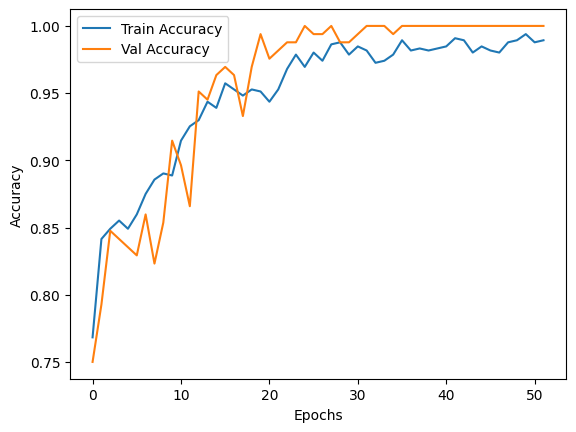

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


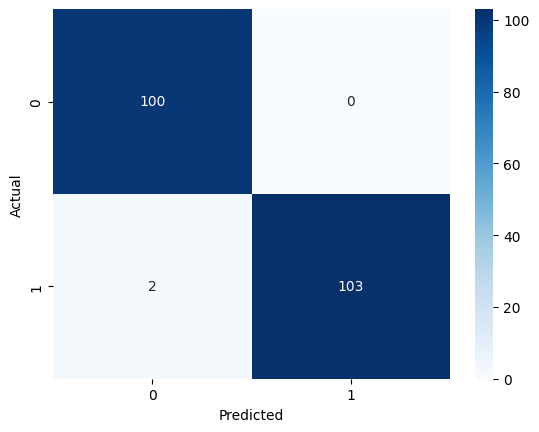

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       1.00      0.98      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = (best_model.predict(x_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))
